In [106]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline
import seaborn as sns

In [108]:
df = pd.read_csv("data/iris.csv")

In [109]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [112]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
df = df.drop('Id',axis=1)

<Figure size 864x576 with 0 Axes>

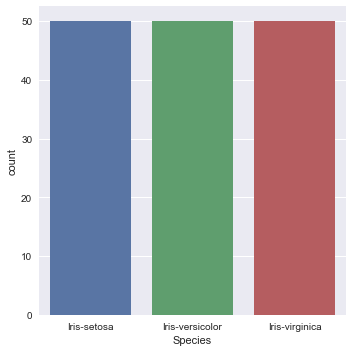

In [114]:
plt.figure(figsize=(12,8))
sns.factorplot(x='Species',data=df,kind='count');

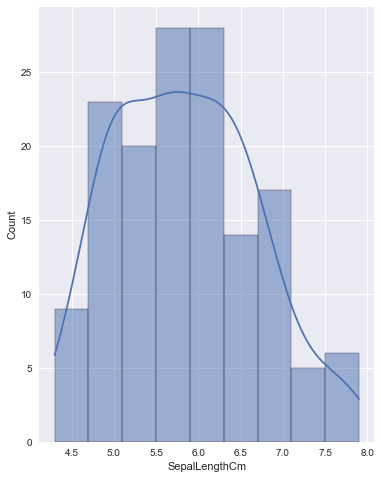

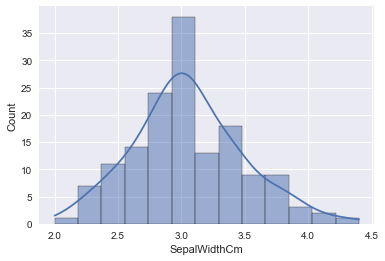

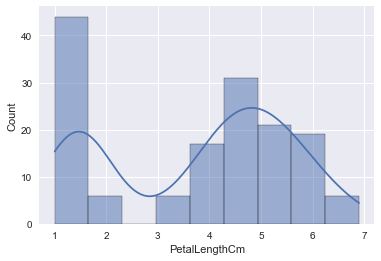

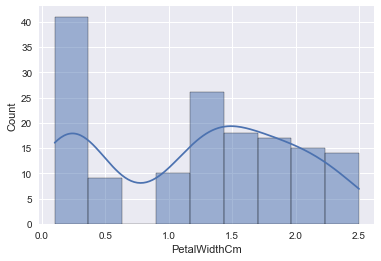

In [115]:
plt.figure(figsize=(6,8))
x = df.drop(['Species'],axis=True)
for i in x.columns:
    sns.histplot(x[i],kde=True)
    plt.show()

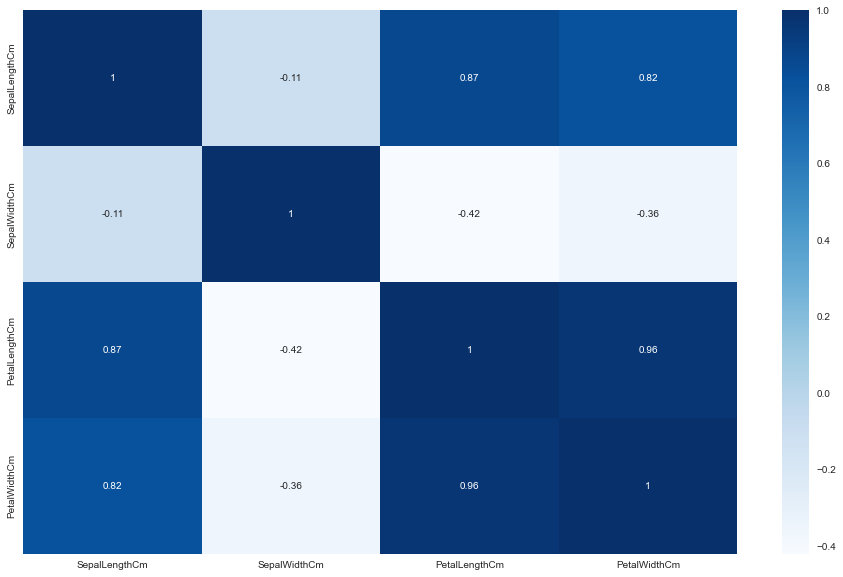

In [116]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

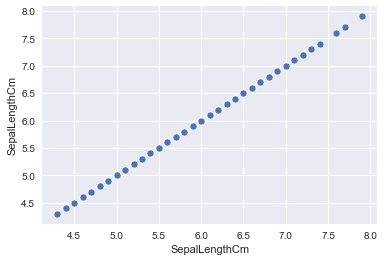

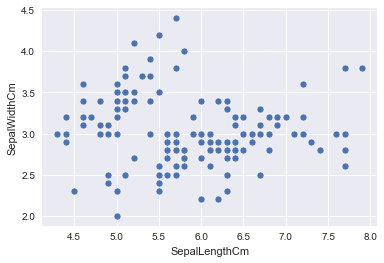

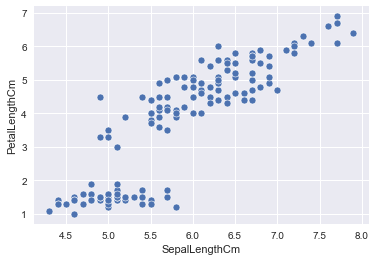

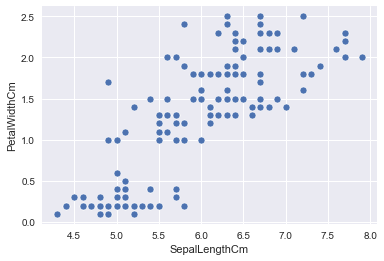

In [117]:
x = 'SepalLengthCm'
for i in df.columns[:-1]:
    sns.scatterplot(x,i,data=df)
    plt.show()


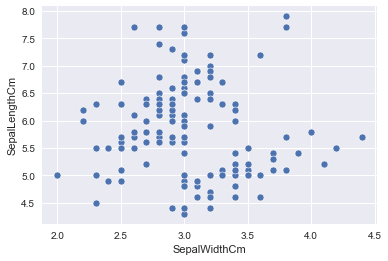

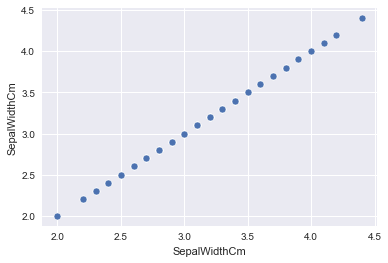

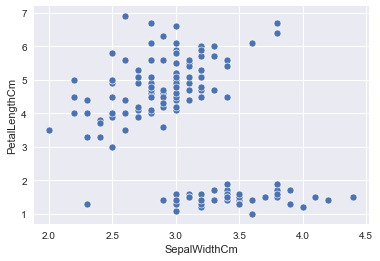

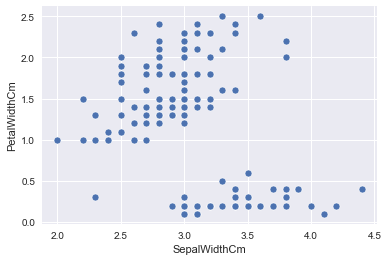

In [118]:
x = 'SepalWidthCm'
for i in df.columns[:-1]:
    sns.scatterplot(x,i,data=df)
    plt.show()

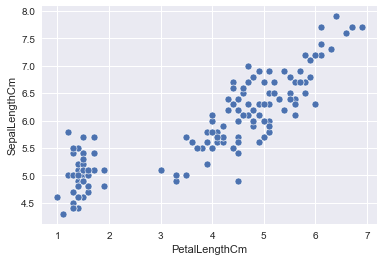

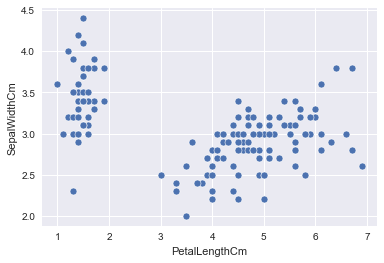

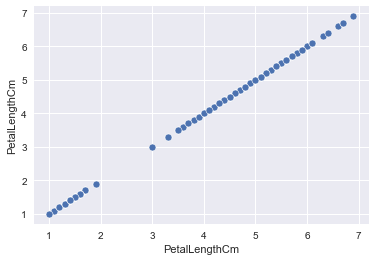

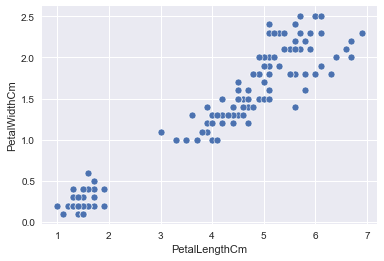

In [119]:
x = 'PetalLengthCm'
for i in df.columns[:-1]:
    sns.scatterplot(x,i,data=df)
    plt.show()

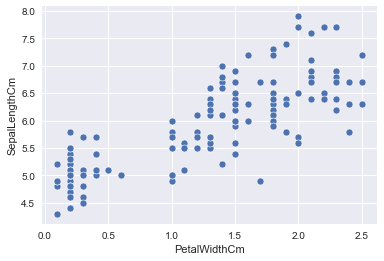

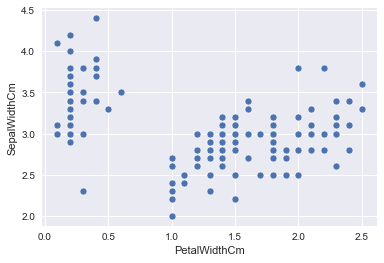

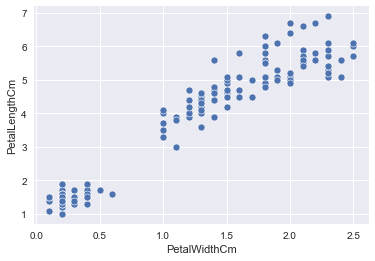

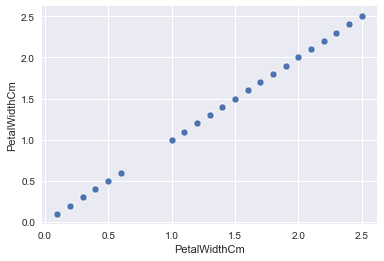

In [120]:
x = 'PetalWidthCm'
for i in df.columns[:-1]:
    sns.scatterplot(x,i,data=df)
    plt.show()

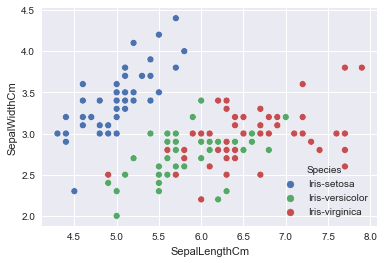

In [121]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species');

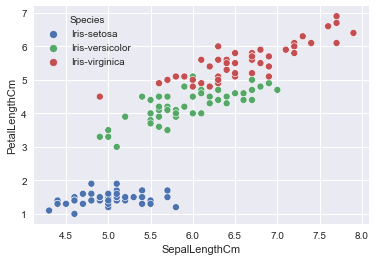

In [122]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species');

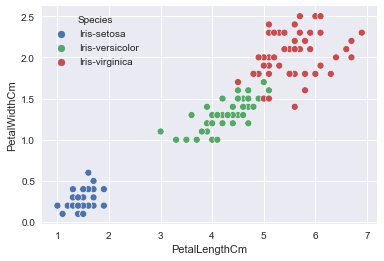

In [123]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species');

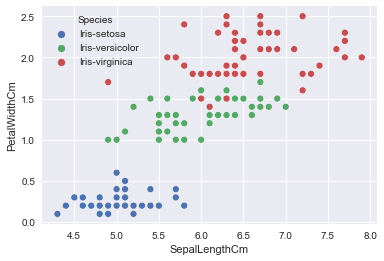

In [124]:
sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm',data=df,hue='Species');

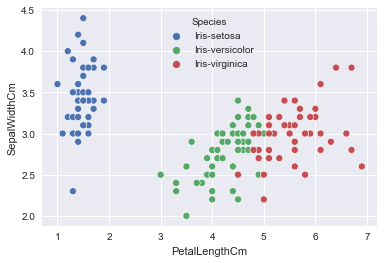

In [125]:
sns.scatterplot(x='PetalLengthCm',y='SepalWidthCm',data=df,hue='Species');

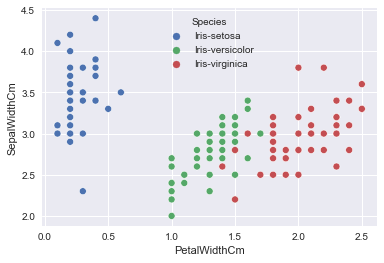

In [126]:
sns.scatterplot(x='PetalWidthCm',y='SepalWidthCm',data=df,hue='Species');

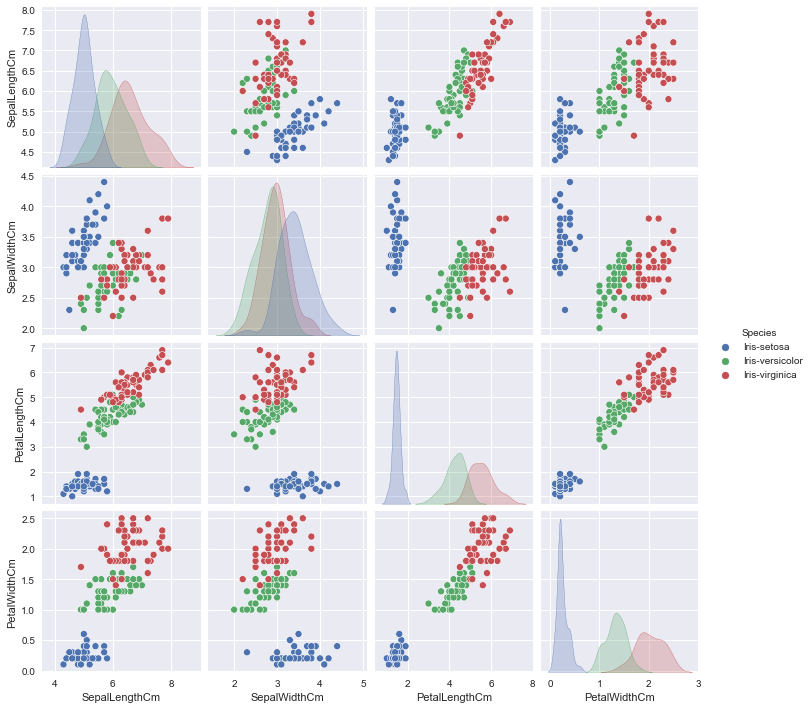

In [127]:
sns.pairplot(df,hue='Species')

In [128]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [129]:
spec = {
    "Species" : {"Iris-setosa":0,
                 "Iris-versicolor":1,
                 "Iris-virginica":2}
}
df.replace(spec,inplace=True)

In [130]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [131]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = df.drop('Species',axis=1)
y = df['Species']
X.shape, y.shape

((150, 4), (150,))

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

In [136]:
def scores(y_pred,y_test):
    print("Classification Report")
    print(classification_report(y_pred,y_test))
    print("Accuracy: ",accuracy_score(y_pred,y_test))
    print("R2 Score: ",r2_score(y_test,y_pred))
        
def pred_true_label(y_pred,y_test):
    print('Actual Label   : ',list(y_test[10:20]))
    print('Predicted Label: ',list(y_pred[10:20]))
    
def conf_mat(y_pred,y_test):
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    fig, ax = plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
    ax.set_ylabel("Predicted", fontsize = 25)
    ax.set_xlabel("Actual", fontsize = 25);

In [137]:
from sklearn.model_selection import GridSearchCV

## KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(2,10),
    'weights':['uniform','distance'],
    'leaf_size':range(10,50,10)
}

grid_search = GridSearchCV(knn,params,n_jobs=-1,verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(10, 50, 10),
                         'n_neighbors': range(2, 10),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [139]:
grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 9, 'weights': 'uniform'}

In [140]:
grid_search.best_score_

0.980952380952381

In [141]:
knn = KNeighborsClassifier(leaf_size=10,n_neighbors=9,weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=9)

In [142]:
y_pred = knn.predict(X_test)

In [143]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 0, 2, 2, 0, 2, 1, 0, 0, 0]
Predicted Label:  [0, 0, 2, 2, 0, 2, 1, 0, 0, 0]


Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


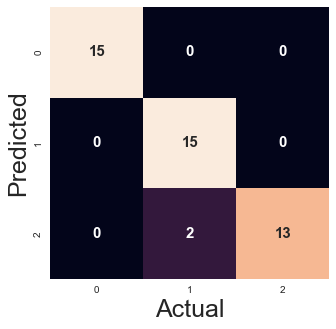

In [144]:
conf_mat(y_pred,y_test)

In [145]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.94        17
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy:  0.9555555555555556
R2 Score:  0.9333333333333333


In [146]:
knn_acc = '95.55%'

## Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
%%time
log_reg = LogisticRegression()

params = {
    'penalty':['l1','l2'],
    'C':[0.0001,0.001,0.01,0.1,1,10,100],
    'solver':['liblinear','lbfgs']
}

grid_search = GridSearchCV(log_reg,params,n_jobs=-1,verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Wall time: 334 ms


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [149]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [150]:
grid_search.best_score_

0.980952380952381

In [151]:
log_reg = LogisticRegression(C=100,penalty='l2',solver='lbfgs')
log_reg.fit(X_train,y_train)

LogisticRegression(C=100)

In [152]:
y_pred = log_reg.predict(X_test)

In [153]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 0, 2, 2, 0, 2, 1, 0, 0, 0]
Predicted Label:  [0, 0, 2, 2, 0, 2, 1, 0, 0, 0]


Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


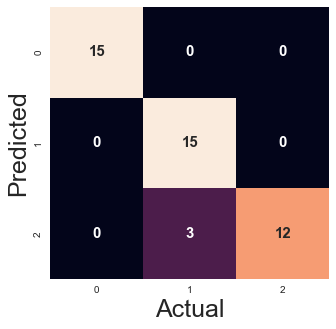

In [154]:
conf_mat(y_pred,y_test)

In [155]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        18
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

Accuracy:  0.9333333333333333
R2 Score:  0.9


In [156]:
log_reg_acc = '93.33%'

## Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [159]:
y_pred = rfc.predict(X_test)

In [160]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 0, 2, 2, 0, 2, 1, 0, 0, 0]
Predicted Label:  [0, 0, 2, 2, 0, 2, 1, 0, 0, 0]


Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


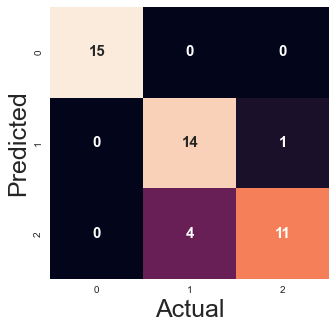

In [161]:
conf_mat(y_pred,y_test)

In [162]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.78      0.85        18
           2       0.73      0.92      0.81        12

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45

Accuracy:  0.8888888888888888
R2 Score:  0.8333333333333334


### Hyperparameter tuning for Random Forest

In [163]:
%%time
rfc = RandomForestClassifier()

params = {
    'n_estimators': range(10,100,10),
    'criterion': ['gini','entropy'],
    'max_depth':range(2,10,1)
}
grid_search = GridSearchCV(rfc,params)
grid_search.fit(X_train,y_train)

Wall time: 47 s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': range(10, 100, 10)})

In [164]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 40}

In [165]:
grid_search.best_score_

0.9714285714285713

In [178]:
rfc = RandomForestClassifier(criterion='entropy',max_depth=2,n_estimators=40)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=40)

In [179]:
y_pred = rfc.predict(X_test)

Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


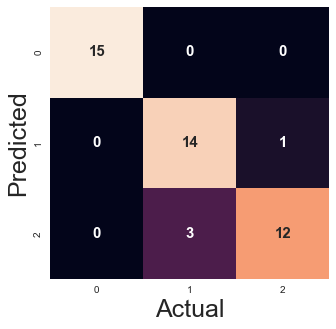

In [180]:
conf_mat(y_pred,y_test)

In [181]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.82      0.87        17
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

Accuracy:  0.9111111111111111
R2 Score:  0.8666666666666667


In [182]:
rfc_acc = '91.11%'

## SVM

In [171]:
from sklearn.svm import SVC

In [172]:
svc = SVC(kernel='rbf',C=1.0,gamma=0.1)
svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [173]:
y_pred = svc.predict(X_test)

Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


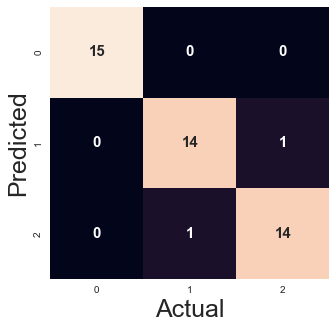

In [174]:
conf_mat(y_pred,y_test)

In [175]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy:  0.9555555555555556
R2 Score:  0.9333333333333333


In [176]:
svc_acc = '95.55%'

In [183]:
models = pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVC','Random Forest'],
    'Score':[log_reg_acc,knn_acc,svc_acc,rfc_acc]})

models.sort_values(by='Score',ascending=False)

,Model,Score
1,KNN,95.55%
2,SVC,95.55%
0,Logistic Regression,93.33%
3,Random Forest,91.11%
